#### An Iris(Flowers) Case Study Notebook with Machine Learning Model Implementation Using SKLEARN

### Notebook by [Simranjot Sandhu](https://www.facebook.com/simranjot.sandhu.503)

### Guided by [Daljit Singh](https://www.facebook.com/daljitsinghtrainer)

#### [Sandhu Soft](https://github.com/ssndhu01)

#### Table of contents

  1.  [Introduction](#Introduction)

  2.  [Required libraries](#Required-Libraries)

  3.  [The problem domain](#Problem-Domain)

  4.  [Step 1: Answering the question](#Answering-The-Question)

  5.  [Step 2: Checking the data](#Checking-The-Data)

  6.  [Step 3: Tidying the data](#Tidying-The-Data)

  7.  [Step 4: Exploratory analysis](#Exploratory-Analysis)

  8.  [Step 5: Classification or Modelling](#Classification)
  
  >[(i). Using KNN Classifier](#Model-1-:-Using-KNearestNeighbour-Classifier)
  
  >[(ii). Using Decision Tree Classifier](#Model-2-:-Using-Decision-Tree-Classifier)

  9.  [Step 6: Conclusion](#Conclusion)



#### Introduction
[[ go back to the top ]](#Table-of-contents)

In the time it took you to read this sentence, terabytes of data have been collectively generated across the world — more data than any of us could ever hope to process, much less make sense of, on the machines we're using to read this notebook.

The disciplinary areas that make up the **data science field include mining, statistics, machine learning, analytics, and some programming. Data mining applies algorithms in the complex data set to reveal patterns that are then used to extract usable and relevant data from the set.**

In this notebook, We are going to go over a basic Python data analysis from start to finish to show how data science workflow looks like.

#### Required Libraries
[[ go back to the top ]](#Table-of-contents)

If you don't have Python on your computer, you can use the [Anaconda Python distribution](https://www.anaconda.com/download/#linux) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **Pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **Scikit-learn**: The essential Machine Learning package in Python.
* **Matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.
* **Tkinter**: Standard Python interface to the Tk GUI toolkit.
* **Sklearn**: It features various classification, regression and clustering algorithms and  interoperate with libraries              like Numpy and Scipy

To make sure you have all of the packages you need, install them with `conda`:

    conda install numpy pandas scikit-learn matplotlib seaborn
    sudo apt-get install python3-tk   (to install tkinter)

#### **Update all the packages to the latest version.**

#### Problem Domain

[[ go back to the top ]](#Table-of-contents)

For the purposes of this exercise, let's pretend we're working for a startup that just got funded to create a smartphone app that automatically identifies species of flowers from pictures taken on the smartphone. 

We've been created a demo machine learning model that takes four measurements of the flowers (sepal length, sepal width, petal length, and petal width) from the End user and identifies the species based on those measurements alone.


<div style="float:left;width:200px;">
<img src="iris_setosa.jpg" width="150px" height="200px"  />
    <b>Iris Setosa</b>
</div>
<div style="float:left;width:200px;">
<img src="iris_versicolor.jpg" width="150px" height="100px" />
    <b>Iris Versicolor</b>
</div>
<div style="float:left;width:200px;">
<img src="iris_virginica.jpg" width="150px" height="200px"  />
    <b>Iris Virginica</b>
    </div>
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
The four measurements we're using currently come from hand-measurements by the field researchers, but they will be automatically measured by an image processing model in the future.


#### Answering The Question

[[ go back to the top ]](#Table-of-contents)

The first step to any data analysis project is to define the question or problem we're looking to solve, and to define a measure (or set of measures) for our success at solving that task. The data analysis checklist has us answer a handful of questions to accomplish that, so let's work through those questions.

Let's do that now. Since we're performing classification, we can use [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) — the fraction of correctly classified flowers — to quantify how well our model is performing. Our company's Head of Data has told us that we should achieve at least 90% accuracy.

**Thinking about and documenting the problem we're working on is an important step to performing effective data analysis that often goes overlooked.** 
#### Don't skip it.

#### Checking The Data

[[ go back to the top ]](#Table-of-contents)

The next step is to look at the data we're working with. Even curated/inspected data sets from the government and other resource can have errors in them, and it's vital that we spot these errors before investing too much time in our analysis.

Generally, we're looking to answer the following questions:

* Is there anything wrong with the data?
* Are there any unexpected values in the data?
* Is this data available in the correct format?
* Do I need to remove any of the data?

Let's start by reading the data into a pandas DataFrame.

In [2]:
import numpy as np
import pandas as pd
from sklearn import neighbors, datasets

We wiill use two datasets here first we found from [Kaggle](https://www.kaggle.com/uciml/iris/version/2) and Another dataset from the [Scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html).

The first row in the data file below defines the column headers, and the headers defines the characteristics of the data.

Each row represents an entry for a flower as four measurements and one class, which tells us the species of the flower.

**One of the first things we should look for is missing data.** to clean them later with some methods.

In [17]:
iris_data = pd.read_csv('iris-data.csv', na_values= np.nan)

Firstly, we will work with Kaggle's Dataset

In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
iris_data.describe()

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
count       150.000000      150.000000       150.000000      145.000000
mean          5.644627        3.054667         3.758667        1.236552
std           1.312781        0.433123         1.764420        0.755058
min           0.055000        2.000000         1.000000        0.100000
25%           5.100000        2.800000         1.600000        0.400000
50%           5.700000        3.000000         4.350000        1.300000
75%           6.400000        3.300000         5.100000        1.800000
max           7.900000        4.400000         6.900000        2.500000


Here we got some null values in the dataset.

Let's Analysis them.

We are going for Analysis. So, We will Use [Matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/) for this purpose.

In [9]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

/home/simranjot/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/simranjot/.local/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/simranjot/.local/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


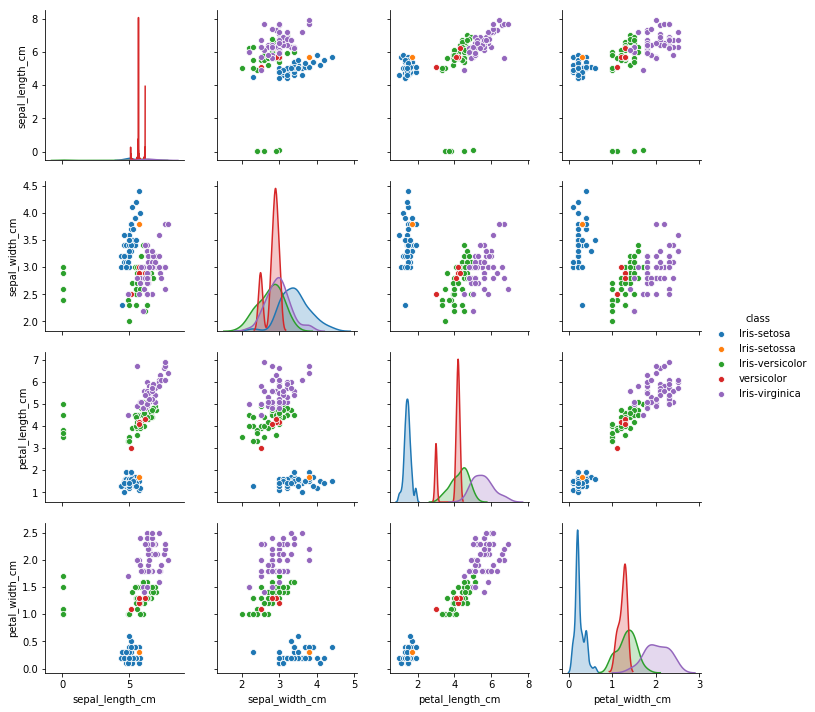

In [11]:
sb.pairplot(iris_data.dropna(), hue='class')

From the scatterplot matrix, we can already see some issues with the data set:

1. There are five classes when there should only be three, meaning there were some coding errors.

2. There are some clear outliers in the measurements that may cause error: one `sepal_width_cm` entry for `Iris-setosa` falls well outside its normal range, and several `sepal_length_cm` entries for `Iris-versicolor` are near-zero for some reason.

In all of these cases, we need to figure out what to do with the erroneous data.

We need to correct all these errors!

#### Tidying The Data

[[ go back to the top ]](#Table-of-contents)

We've identified several errors in the data set, we need to fix them before further analysis.

>There are five classes when there should only be three, meaning there were some coding errors.

Let's use the DataFrame to fix these errors.

In [18]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] ='Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

/home/simranjot/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


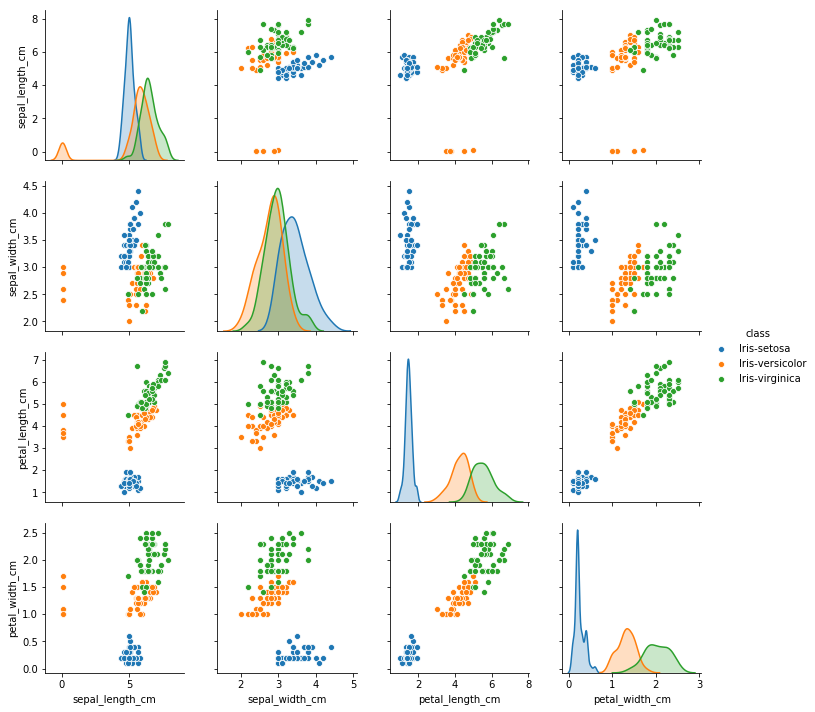

In [21]:
sb.pairplot(iris_data.dropna(), hue='class') #Class is column Name

iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

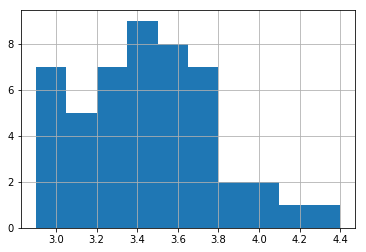

In [20]:
# This line drops any 'Iris-setosa' rows with a separal width less than 2.5 cm
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

Now, we are fixing some outliers!

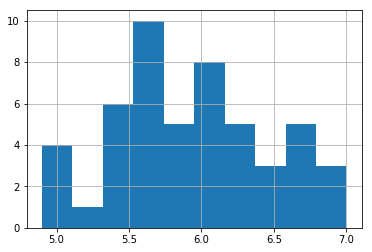

In [22]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0

iris_data.loc[iris_data['class'] == 'Iris-versicolor', 
              'sepal_length_cm'].hist()

Now,We are going to check the null values in our dataset!

In [23]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
7               5.0             3.4              1.5             NaN   
8               4.4             2.9              1.4             NaN   
9               4.9             3.1              1.5             NaN   
10              5.4             3.7              1.5             NaN   
11              4.8             3.4              1.6             NaN   

          class  
7   Iris-setosa  
8   Iris-setosa  
9   Iris-setosa  
10  Iris-setosa  
11  Iris-setosa

We found a total of 5 NaN Values in `petal_width_cm` column. 

So, Lets analysis other characteristics of class `Iris-setosa`.

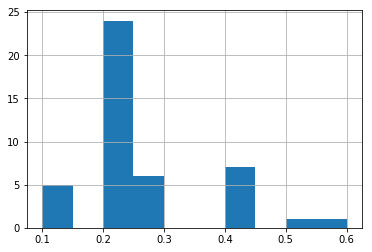

In [24]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()


Here, We use mean imputation method to deal with NaN Values.

**Mean Imputation**: If we know that the values for a measurement fall in a certain range, we can fill in empty values with the average of that measurement.

In [25]:
average_petal_width = iris_data.loc[iris_data['class'] == 
                                    'Iris-setosa', 
                                    'petal_width_cm'].mean()

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'] == 
               average_petal_width)]

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
7               5.0             3.4              1.5            0.25   
8               4.4             2.9              1.4            0.25   
9               4.9             3.1              1.5            0.25   
10              5.4             3.7              1.5            0.25   
11              4.8             3.4              1.6            0.25   

          class  
7   Iris-setosa  
8   Iris-setosa  
9   Iris-setosa  
10  Iris-setosa  
11  Iris-setosa

In [26]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

Empty DataFrame
Columns: [sepal_length_cm, sepal_width_cm, petal_length_cm, petal_width_cm, class]
Index: []

we cleaned all the darta and use for further analysis purpose.

Firstly, We will Save this data for later use.

In [27]:
iris_data.to_csv('iris-data-clean.csv', index=False)

Now, Lets take a look on the other dataset i.e. From scikit package.

In [28]:
iris = datasets.load_iris()

In [32]:
X, y = iris.data, iris.target

In [33]:
X = pd.DataFrame(X, columns=iris.feature_names)
X.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [34]:
X.shape

(150, 4)

this is same as the first dataset.

In [35]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Exploratory Analysis

[[ go back to the top ]](#Table-of-contents)

After tidying our data, we can start analyzing it!

Exploratory analysis is the step where we start delving deeper into the data set beyond the outliers and errors. We'll be looking to answer questions such as:

* How is my data distributed?

* Are there any correlations in my data?

This is the stage where we plot all the data in as many ways as possible. Create many charts, but don't bother making them pretty — these charts are for internal use.

Let's try out Voilinplot matrix now.

/home/simranjot/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


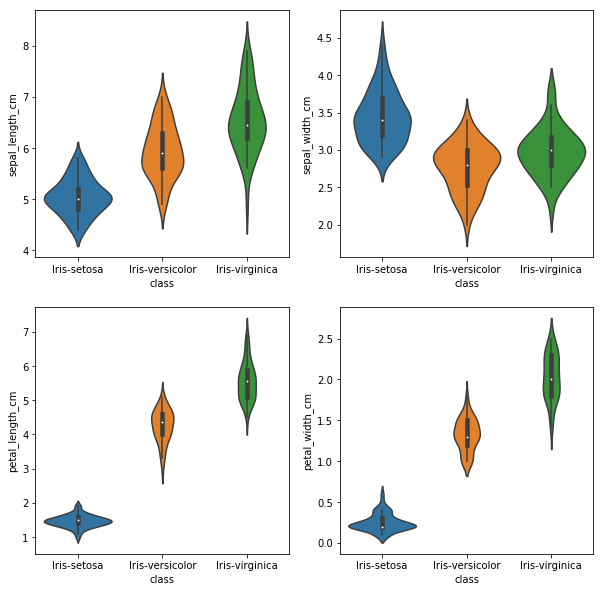

In [37]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(iris_data.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='class', y=column, data=iris_data)

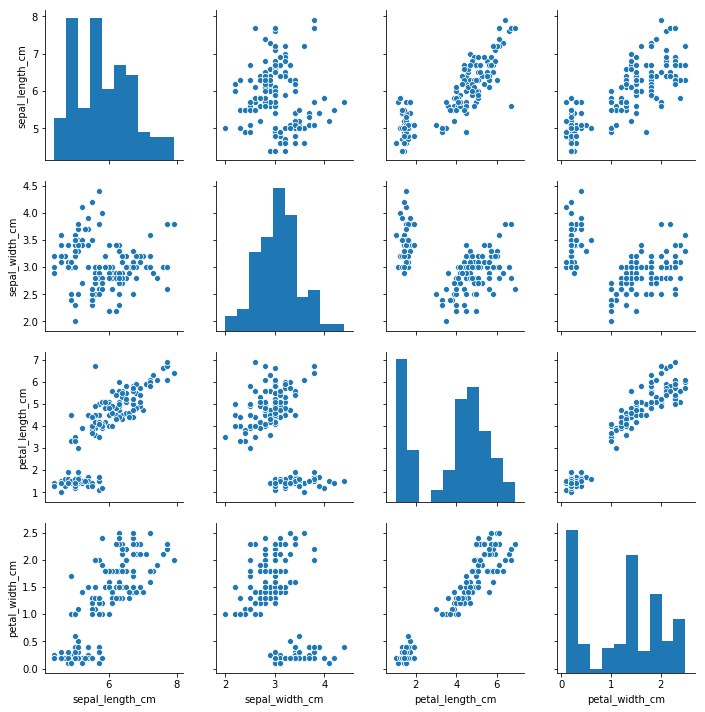

In [38]:
sb.pairplot(iris_data)

/home/simranjot/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


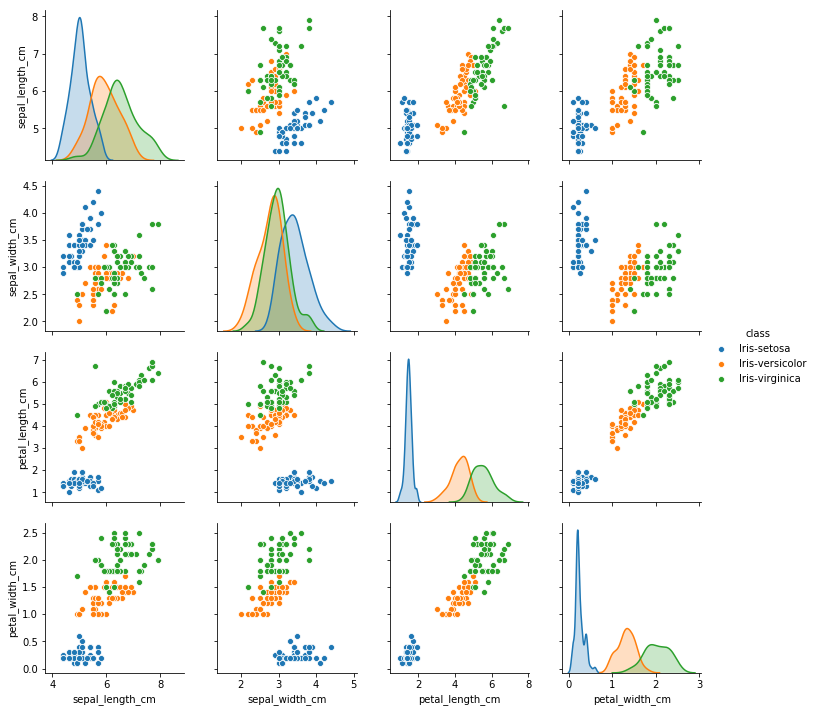

In [40]:
sb.pairplot(iris_data, hue='class')

#### Step 5: Classification

[[ go back to the top ]](#Table-of-contents)

**Note**: Tidying and exploring our data is a vital component to any data analysis. If we had jumped straight to the modeling step, we would have created a faulty classification model.

Remember: **Bad data leads to bad models.**

We must have to check our data before going for the modelling of the data.

<hr />



A **training set** is a random subset of the data that we use to train our models.

A **testing set** is a random subset of the data (mutually exclusive from the training set) that we use to validate our models on unforseen data.

<hr />

Especially in sparse data sets like ours, it's easy for models to **overfit** the data: The model will learn the training set so well that it won't be able to handle most of the cases it's never seen before. This is why it's important for us to build the model with the training set, but score it with the testing set.

Note that once we split the data into a training and testing set, we should treat the testing set like it no longer exists: We cannot use any information from the testing set to build our model or else we're cheating.

Let's set up our data first.

### Model 1 : Using KNearestNeighbour Classifier

[[go back to top]](#Table-of-contents)

In [41]:
# create the model, consider this a black box
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')

# training the model on our data
knn.fit(X, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Try out Model with local values!

In [50]:
#sepal len :2cm , width: 1cm and petal len: 2cm, width: 1cm 
# which kind of iris is this??
X_pred = [2, 1, 2, 1]

result = knn.predict([X_pred, ])
print(iris.target_names[result])

['setosa']


In [51]:
# We can also predict the probability of belonging to differnt classes
print(iris.target_names)
print(knn.predict_proba([X_pred, ]))

['setosa' 'versicolor' 'virginica']
[[1. 0. 0.]]


Our model predicts all the 5 neighbours belongs to class setosa with sepal len :2cm , width: 1cm and petal len: 2cm, width: 1cm 

#### For evaluating the Model
We need to split our data into train and test sets

In [53]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [59]:
# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')

# We train just on the X_train variable containing 112 examples
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [60]:
predictions = knn.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions, y_test)

1.0

Our model classifies 100% on unseen data correctly this time!

Let's try our next classifier.

### Model 2 : Using Decision Tree Classifier

[[go back to top]](#Table-of-contents)

In [63]:
# We have to extract the data in specific format from pandas data frames for classification:
all_inputs = iris_data[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

# Similarly, we can extract the classes
all_classes = iris_data['class'].values

# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_classes[5]

In [67]:
(training_inputs, testing_inputs, training_classes, testing_classes) = \
train_test_split(all_inputs, all_classes, train_size=0.75, random_state=1)

/home/simranjot/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### Initializing the decision tree classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier

# Initializing our model
decision_tree_classifier = DecisionTreeClassifier()

# Training our model using Training input and training classes
decision_tree_classifier.fit(training_inputs, training_classes)

# Collecting the score using unseen testing inputs and classes
decision_tree_classifier.score(testing_inputs, testing_classes)


0.9736842105263158

In [75]:
#predicting the class
prediction = decision_tree_classifier.predict(testing_inputs)

#predicting the probability
probs = decision_tree_classifier.predict_proba(testing_inputs)



However, there's a catch: Depending on how our training and testing set was sampled, our model can achieve anywhere from 80% to 100% accuracy: